Code to create the figure 2 of the article.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

First we take the data of migrant words created in the Create_migrants file.

In [2]:
migrant = pd.read_csv("Migrant/migrant_1800.csv")
migrant.drop(migrant.columns[0],inplace=True,axis=1)
migrant[migrant["word"]=="cat"]

,word,year,count,language,Rank
1908,cat,1800,2328,english,4029.0
1909,cat,1839,2542,spanish,1466.0
1910,cat,2001,22542,italian,4505.0


The "migrants" function let's us find all the migrant words that originated from language_out and got into "language_in" inside a set of years.

In [11]:
def migrants(language_out,language_in,years):
    #Take only the first appearances of words
    
    migrant_df = pd.read_csv("Migrant/migrant_1800.csv")

    migrant_df.drop(migrant_df.columns[0],inplace=True,axis=1)
    
    first_appearance = migrant_df.drop_duplicates(subset='word',
                                               keep='first')
    #take the words created by the out language.
    out_words = first_appearance[first_appearance["language"] == language_out ]
    
    #Take the words that
    migrated_from_out = migrant_df[(migrant_df["word"].isin(out_words["word"])) & 
                               (migrant_df["year"].isin(years)) &
                                (migrant_df["language"] == language_in)
                               ]
    return(migrated_from_out)

migrants("english","spanish",range(1900,2009))


,word,year,count,language,Rank
215,agenda,1991,35093,spanish,4702.0
431,american,1916,7934,spanish,2952.0
732,area,1967,19811,spanish,4926.0
1162,bar,2001,51560,spanish,4680.0
1287,benefactor,1955,14708,spanish,4372.0
...,...,...,...,...,...
14117,web,2000,57747,spanish,4288.0
14155,william,1916,4736,spanish,4829.0
14160,wilson,1916,7180,spanish,3240.0
14182,women,2000,49763,spanish,4913.0


zipf creates the list of words from language_out that reached language_in before a given year and then orders them according to their count in the given year.

In [12]:
def zipf(language_out,language_in,year):
    migrant_words = migrants(language_out,language_in,range(1850,year))["word"]
    
    lan_in = pd.read_csv("Top5000/"+"top_"+language_in + "_exc_all" +
                ".csv",header=None)
    
    lan_in_year = lan_in[lan_in[1]==year]
    
    lista = lan_in_year[lan_in_year[0].isin(migrant_words)]
    lista = lista.sort_values(by=2,ascending=False)
    lista["rank"] = lista[2].rank(ascending=False)
    
    return(lista)
    

In [13]:
zipf("italian","english",2000)

,0,1,2,rank
1300037,data,2000,8316428,1.0
1301423,core,2000,1196693,2.0
1301838,card,2000,946887,3.0
1301878,zero,2000,928882,4.0
1301929,budget,2000,905131,5.0
1301993,regime,2000,879442,6.0
1302452,decade,2000,718863,7.0
1302454,dc,2000,718629,8.0
1302475,bus,2000,710400,9.0
1302538,fax,2000,690852,10.0


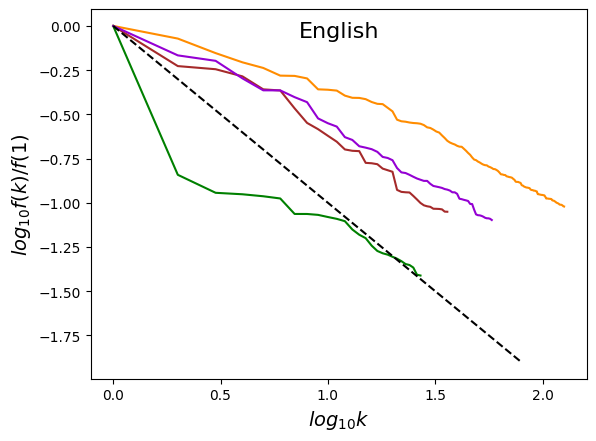

In [15]:
language_in = "english"
languages = ["spanish","french","italian","german"]
colors = {"english":"steelblue","french":"darkorange","german":"darkviolet",
         "italian":"green","spanish":"brown"}

for language_out in languages:
    lista = zipf(language_out,language_in,2000)
    
    
    plt.plot(np.log10(lista["rank"]),
             np.log10(lista.iloc[:,2].values/lista.iloc[0,2]),
            label=language_out,color = colors[language_out])
    

plt.plot(np.arange(0,2.,0.1),-np.arange(0,2.,0.1),"k--")
# plt.legend()

plt.title("English",y=1,pad=-20,fontsize=16)
plt.xlabel("$log_{10} k$",fontsize=14)
plt.ylabel("$log_{10} f(k)/f(1)$",fontsize=14)


plt.savefig('Fig2_data/english_new.png',bbox_inches = "tight")

plt.show()

    

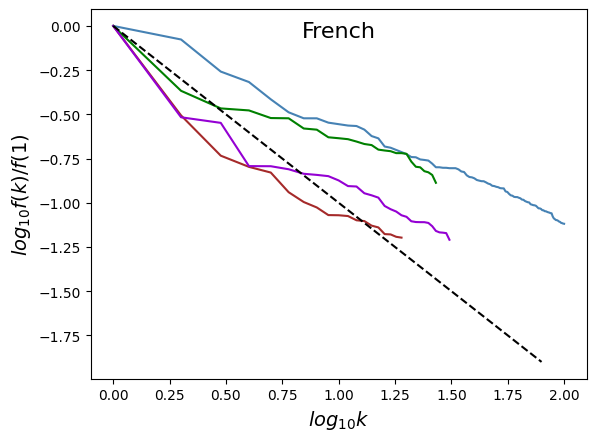

In [17]:
language_in = "french"
languages = ["spanish","english","italian","german"]
colors = {"english":"steelblue","french":"darkorange","german":"darkviolet",
         "italian":"green","spanish":"brown"}

for language_out in languages:
    
    lista = zipf(language_out,language_in,2000)
    
    plt.plot(np.log10(lista["rank"]),
             np.log10(lista.iloc[:,2].values/lista.iloc[0,2]),
            label=language_out,color = colors[language_out])
    
    
plt.plot(np.arange(0,2,0.1),-np.arange(0,2,0.1),"k--")
# plt.legend()

plt.title("French")

plt.title("French",y=1,pad=-20,fontsize=16)
plt.xlabel("$log_{10} k$",fontsize=14)
plt.ylabel("$log_{10} f(k)/f(1)$",fontsize=14)


plt.savefig('Fig2_data/french_new.png',bbox_inches = "tight")

plt.show()

    

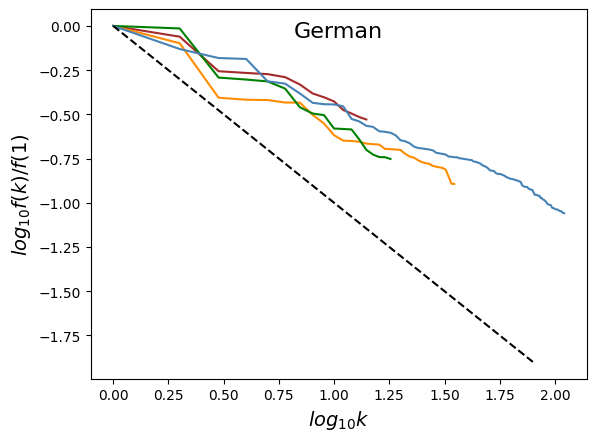

In [18]:
language_in = "german"
languages = ["spanish","french","italian","english"]
colors = {"english":"steelblue","french":"darkorange","german":"darkviolet",
         "italian":"green","spanish":"brown"}

for language_out in languages:
    
    lista = zipf(language_out,language_in,2000)
    plt.plot(np.log10(lista["rank"]),
             np.log10(lista.iloc[:,2].values/lista.iloc[0,2]),
            label=language_out,color = colors[language_out])
    
    
plt.plot(np.arange(0,2,0.1),-np.arange(0,2,0.1),"k--")
# plt.legend()

plt.title("German")

plt.title("German",y=1,pad=-20,fontsize=16)
plt.xlabel("$log_{10} k$",fontsize=14)
plt.ylabel("$log_{10} f(k)/f(1)$",fontsize=14)


plt.savefig('Fig2_data/german_new.png',bbox_inches = "tight")


plt.show()

    

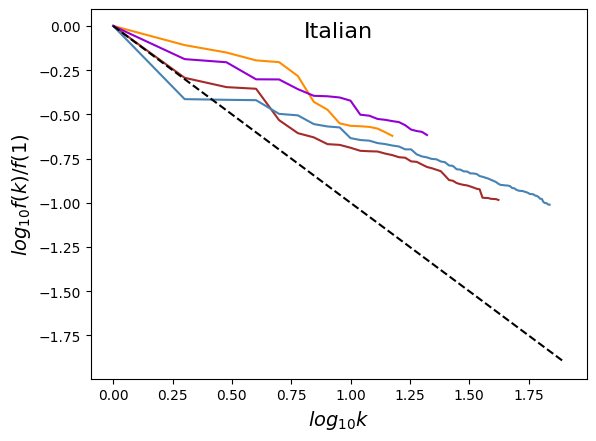

In [19]:
language_in = "italian"
languages = ["spanish","french","english","german"]
colors = {"english":"steelblue","french":"darkorange","german":"darkviolet",
         "italian":"green","spanish":"brown"}

for language_out in languages:
    lista = zipf(language_out,language_in,2000)
    
    plt.plot(np.log10(lista["rank"]),
             np.log10(lista.iloc[:,2].values/lista.iloc[0,2]),
            label=language_out,color = colors[language_out])
    
    
plt.plot(np.arange(0,2,0.1),-np.arange(0,2,0.1),"k--")
# plt.legend()



plt.title("Italian",y=1,pad=-20,fontsize=16)
plt.xlabel("$log_{10} k$",fontsize=14)
plt.ylabel("$log_{10} f(k)/f(1)$",fontsize=14)


plt.savefig('Fig2_data/italian_new.png',bbox_inches = "tight")



plt.show()

    

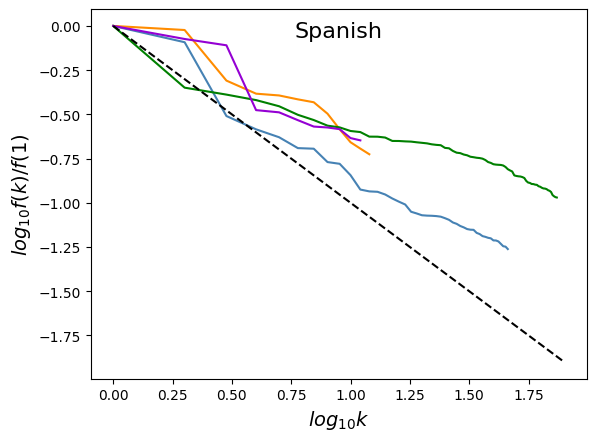

In [20]:
language_in = "spanish"
languages = ["english","french","italian","german"]
colors = {"english":"steelblue","french":"darkorange","german":"darkviolet",
         "italian":"green","spanish":"brown"}


for language_out in languages:
    lista = zipf(language_out,language_in,2000)
    
    
    plt.plot(np.log10(lista["rank"]),
             np.log10(lista.iloc[:,2].values/lista.iloc[0,2]),
            label=language_out,color = colors[language_out])
    
    
plt.plot(np.arange(0,2,0.1),-np.arange(0,2,0.1),"k--")
# plt.legend()



plt.title("Spanish",y=1,pad=-20,fontsize=16)
plt.xlabel("$log_{10} k$",fontsize=14)
plt.ylabel("$log_{10} f(k)/f(1)$",fontsize=14)


plt.savefig('Fig2_data/spanish_new.png',bbox_inches = "tight")



plt.show()

    

## Create final image

In [21]:
import matplotlib.patches as patches
from matplotlib.legend_handler import HandlerPatch

# --- handlers ---

class HandlerRect(HandlerPatch):

    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height,
                       fontsize, trans):

        x = width//2
        y = 0
        w = h = 10

        # create
        p = patches.Rectangle(xy=(x, y), width=w, height=h)

        # update with data from oryginal object
        self.update_prop(p, orig_handle, legend)

        # move xy to legend
        p.set_transform(trans)

        return [p]

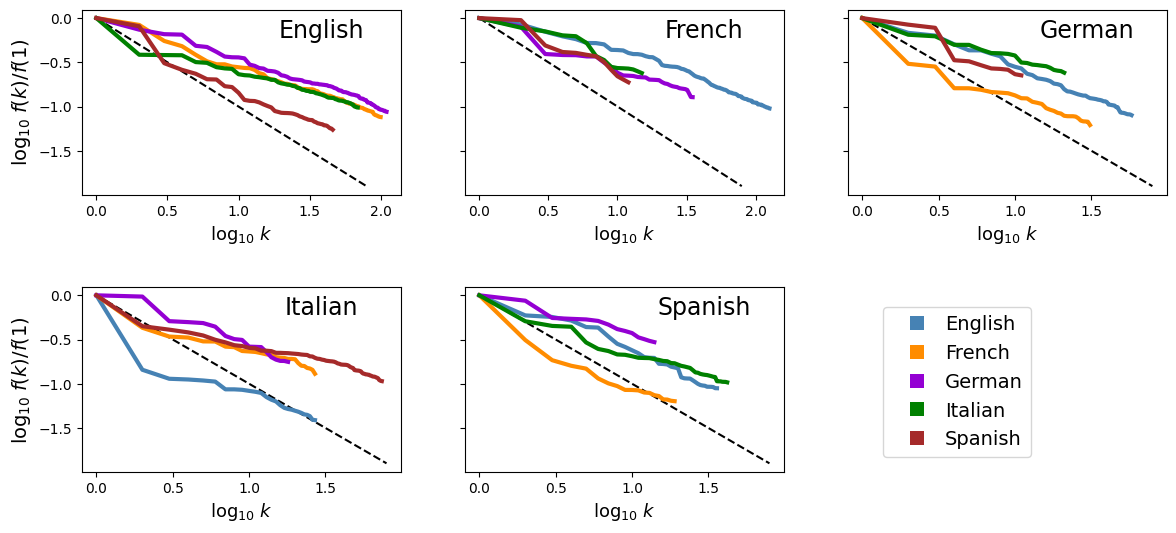

In [23]:
import matplotlib.patches as patches


languages = ["english","french","german","italian","spanish"]
languagesM = ["English","French","German","Italian","Spanish"]
# exc = ["","_exc_all","_exc_none"]

ex = ""

colors = {"english":"steelblue","french":"darkorange","german":"darkviolet",
         "italian":"green","spanish":"brown"}
# exclude_title = ["exclude each", "exclude all", "exclude none"]



fig = plt.figure(figsize=(14,6))
plt.subplots_adjust(hspace=0.5)


import matplotlib as mpl

spec = mpl.gridspec.GridSpec(ncols=3, nrows=2)


ax1 = fig.add_subplot(spec[0,0])
ax2 = fig.add_subplot(spec[0,1])
ax3 = fig.add_subplot(spec[0,2])
ax4 = fig.add_subplot(spec[1,0])
ax5 = fig.add_subplot(spec[1,1])

axs = [ax1,ax2,ax3,ax4,ax5]

    
for j,lan in enumerate(languages):

    axs[j].plot(np.arange(0,2.,0.1),-np.arange(0,2.,0.1),"k--")
    
    for k,lan2 in enumerate(languages):
        if lan == lan2:
            continue
            
        lista = zipf(lan,lan2,2000)
    
        axs[j].plot(np.log10(lista["rank"]),
                     np.log10(lista.iloc[:,2].values/lista.iloc[0,2]),
                   color = colors[lan2],
                   linewidth=3)
            

        

        axs[j].set_title(languagesM[j],y=1,x=0.75,pad=-20,fontsize=17)
 
    
axs[0].set_ylabel(r"log$_{10} \; f(k)/f(1)$",fontsize=14)
axs[3].set_ylabel(r"log$_{10} \; f(k)/f(1)$",fontsize=14)
axs[2].set_xlabel(r"log$_{10} \; k$",fontsize=13)
axs[3].set_xlabel(r"log$_{10} \; k$",fontsize=13)
axs[4].set_xlabel(r"log$_{10} \; k$",fontsize=13)
axs[0].set_xlabel(r"log$_{10} \; k$",fontsize=13)
axs[1].set_xlabel(r"log$_{10} \; k$",fontsize=13)


axs[1].set_yticklabels([])
axs[2].set_yticklabels([])
axs[4].set_yticklabels([])


import matplotlib.patches as mpatches

brown_patch = mpatches.Patch(color='brown', label='Spanish')
green_patch = mpatches.Patch(color='green', label='Italian')
darkviolet_patch = mpatches.Patch(color='darkviolet', label='German')
darkorange_patch = mpatches.Patch(color='darkorange', label='French')
steelblue_patch = mpatches.Patch(color='steelblue', label='English')

# plt.plot(2000,1,markersize=0.001,label="Source Language",
#             color="black",marker="o")

rectb = patches.Rectangle((0,0), 1, 1, facecolor='brown')
rectg = patches.Rectangle((0,0), 1, 1, facecolor='green')
rectd = patches.Rectangle((0,0), 1, 1, facecolor='darkviolet')
rectdo= patches.Rectangle((0,0), 1, 1, facecolor='darkorange')
rects = patches.Rectangle((0,0), 1, 1, facecolor='steelblue')

plt.legend((rects,rectdo,rectd,rectg,rectb),
        ("English","French","German","Italian","Spanish"),
           handler_map = {
            patches.Rectangle: HandlerRect()},
          loc="upper center",
           ncol=1,
    bbox_to_anchor=(0.75, 0.4),
    bbox_transform=fig.transFigure ,
          fontsize=14
          )

plt.savefig('Fig2_data/image_new.png',bbox_inches = "tight")
plt.savefig('Fig2_data/image_new.pdf',bbox_inches = "tight")
